In [1]:
%%html
<img src="logo.jpg",width=60,height=60>

Lapage était originellement une librairie physique avec plusieurs points de vente. Mais devant le succès de certains de ses produits et l’engouement de ses clients, elle a décidé depuis 2 ans d’ouvrir un site de vente en ligne.  
Vous intervenez car l’entreprise souhaite faire le point après deux ans d’exercice, et pouvoir analyser ses points forts, ses points faibles, les comportements clients, etc.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from my_module import *

sns.set(style="darkgrid", palette="rainbow")
pd.set_option("display.float_format", lambda x: "%.2f" % x)

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_customer = pd.read_csv("data/customers.csv")
df_product = pd.read_csv("data/products.csv")
df_transaction = pd.read_csv("data/transactions.csv")

## Clients

In [4]:
df_customer.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [5]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


Pas de valeurs nulles  
8623 clients  
Type de variable OK

In [6]:
search_uniqueness(df_customer)

client_id: uniqueness checked, potential primary key
The variable sex is repeated 8621 times
The variable birth is repeated 8547 times


Pas de redondance dans le client_id

In [7]:
search_cardinality(df_customer)

client_id
Cardinality - The variable client_id has 8623 distinct values.
--------------------------------------------------------------------------------
sex
['f' 'm']
--------------------------------------------------------------------------------
birth
Cardinality - The variable birth has 76 distinct values.
--------------------------------------------------------------------------------


Pas d'incohérence

In [8]:
df_customer["birth"].describe()

count   8623.00
mean    1978.28
std       16.92
min     1929.00
25%     1966.00
50%     1979.00
75%     1992.00
max     2004.00
Name: birth, dtype: float64

Pas de valeurs aberrantes pour l'âge

In [9]:
# Création de la variable âge à partir de l'année en cours !!! ventes en 2023 ?
# currentDateTime = datetime.datetime.now()
# date = currentDateTime.date()
# year = date.year
df_customer["age"] = df_customer["birth"].apply(lambda x: 2023 - x)

In [10]:
df_customer.head()

,client_id,sex,birth,age
0,c_4410,f,1967,56
1,c_7839,f,1975,48
2,c_1699,f,1984,39
3,c_5961,f,1962,61
4,c_5320,m,1943,80


## Produits

In [11]:
df_product.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [12]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


**3287 références, 3 variables  
Pas de valeurs nulles  
Attention type categ**

In [13]:
# Modification du type de categ
df_product["categ"] = df_product["categ"].astype("category")

In [14]:
# Recherche de valeurs uniques
search_uniqueness(df_product)

id_prod: uniqueness checked, potential primary key
The variable price is repeated 1832 times
The variable categ is repeated 3284 times


**Pas de doublons dans les id_prod**

In [15]:
# Analyse de la cardinalité des variables
search_cardinality(df_product)

id_prod
Cardinality - The variable id_prod has 3287 distinct values.
--------------------------------------------------------------------------------
price
Cardinality - The variable price has 1455 distinct values.
--------------------------------------------------------------------------------
categ
[0, 1, 2]
Categories (3, int64): [0, 1, 2]
--------------------------------------------------------------------------------


**3 catégories de produits**

In [16]:
df_product["price"].describe()

count   3287.00
mean      21.86
std       29.85
min       -1.00
25%        6.99
50%       13.06
75%       22.99
max      300.00
Name: price, dtype: float64

**Produits avec une valeur négative**

In [17]:
df_product[df_product["price"] <= 0]

NumExpr defaulting to 4 threads.


,id_prod,price,categ
731,T_0,-1.00,0


In [18]:
df_transaction[df_transaction["id_prod"] == "T_0"]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [19]:
df_transaction[df_transaction["id_prod"] == "T_0"].shape

(200, 4)

**200 transactions tests avec le produit T_0 au prix négatif enrégistrées lors du lancement du site ecommerce le 1er mars 2021.  
Produit et transactions à supprimer**

In [20]:
# Suppresion article T_0
df_product.drop(df_product[df_product["id_prod"] == "T_0"].index, inplace=True)

In [21]:
# Suppresion transactions avec article T_0
df_transaction.drop(df_transaction[df_transaction["id_prod"] == "T_0"].index, inplace=True)

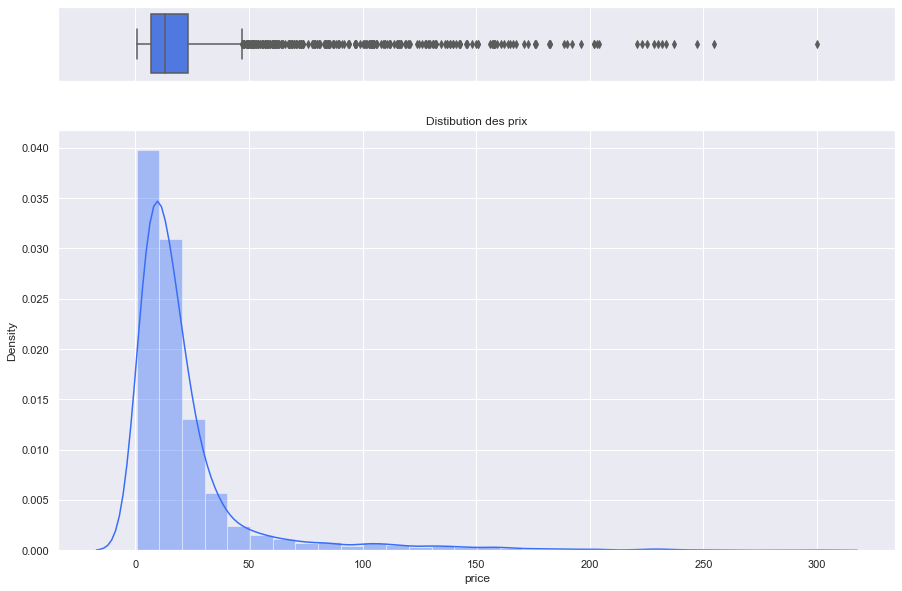

In [22]:
# Analyse de la distribution des prix
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
f.set_figheight(10)
f.set_figwidth(15)
plt.title("Distibution des prix")
sns.boxplot(df_product["price"], ax=ax_box)
sns.distplot(a=df_product["price"], hist=True, kde=True, bins=30, ax=ax_hist)
ax_box.set(xlabel='')
plt.show();

**Présence de nombreux outliers.  
Analyse par catégorie plus pertinente**

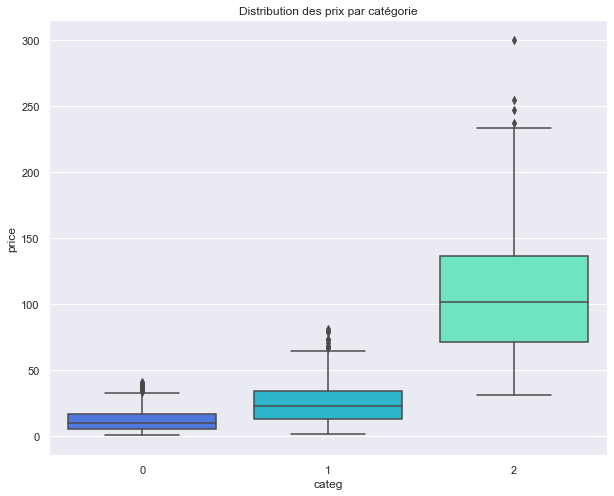

In [23]:
# Distribution des prix par catégorie
plt.figure(figsize=(10, 8))
sns.boxplot(x=df_product["categ"], y=df_product["price"])
plt.title("Distribution des prix par catégorie")
plt.show();

**Catégorie 2 : probablement des livres de collection d'une plus grande valeur. Pas de valeurs aberrantes.  
On conserve ces datas**

## Transactions

In [24]:
df_transaction.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


**Transactions en 2022 et 2023 !!!  
Compte tenu de la précison des données (id_prod, session_id et client_id) pour les transactions "futures", il ne peut s'agir de prévisions.  
Il est donc judicieux de situer notre analyse en 2023.**

In [25]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679332 non-null  object
 1   date        679332 non-null  object
 2   session_id  679332 non-null  object
 3   client_id   679332 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


**Aucune valeur nulle, modifier le type de date.**

In [26]:
# Séparation date et heure
df_transaction['time'] = pd.to_datetime(df_transaction['date']).dt.time
df_transaction['date'] = pd.to_datetime(df_transaction['date']).dt.date
df_transaction['date'] = pd.to_datetime(df_transaction['date'])

In [27]:
df_transaction.head()

,id_prod,date,session_id,client_id,time
0,0_1518,2022-05-20,s_211425,c_103,13:21:29.043970
1,1_251,2022-02-02,s_158752,c_8534,07:55:19.149409
2,0_1277,2022-06-18,s_225667,c_6714,15:44:33.155329
3,2_209,2021-06-24,s_52962,c_6941,04:19:29.835891
4,0_1509,2023-01-11,s_325227,c_4232,08:22:08.194479


In [28]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   time        679332 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 31.1+ MB


In [29]:
search_uniqueness(df_transaction)

The variable id_prod is repeated 676066 times
The variable date is repeated 678602 times
The variable session_id is repeated 337017 times
The variable client_id is repeated 670732 times
The variable time is repeated 341516 times


Pas de valeurs uniques, classe d'association

In [30]:
search_cardinality(df_transaction)

id_prod
Cardinality - The variable id_prod has 3266 distinct values.
--------------------------------------------------------------------------------
date
Cardinality - The variable date has 730 distinct values.
--------------------------------------------------------------------------------
session_id
Cardinality - The variable session_id has 342315 distinct values.
--------------------------------------------------------------------------------
client_id
Cardinality - The variable client_id has 8600 distinct values.
--------------------------------------------------------------------------------
time
Cardinality - The variable time has 337816 distinct values.
--------------------------------------------------------------------------------


In [31]:
panier = df_transaction["session_id"].nunique()
article = df_transaction["session_id"].size
ratio = article / panier
print(f"{panier} transactions (paniers) pour {article} articles vendus,")
print(f"soit {ratio:,.2f} articles en moyenne par panier.")

342315 transactions (paniers) pour 679332 articles vendus,
soit 1.98 articles en moyenne par panier.


In [32]:
df_transaction.head()

,id_prod,date,session_id,client_id,time
0,0_1518,2022-05-20,s_211425,c_103,13:21:29.043970
1,1_251,2022-02-02,s_158752,c_8534,07:55:19.149409
2,0_1277,2022-06-18,s_225667,c_6714,15:44:33.155329
3,2_209,2021-06-24,s_52962,c_6941,04:19:29.835891
4,0_1509,2023-01-11,s_325227,c_4232,08:22:08.194479


In [33]:
remove_duplicates(df_transaction)

0 duplicates have been removed


## Jointure des 3 df

In [34]:
df = df_transaction.merge(df_product, how="outer", on="id_prod", indicator=True)

In [35]:
df.head()

,id_prod,date,session_id,client_id,time,price,categ,_merge
0,0_1518,2022-05-20,s_211425,c_103,13:21:29.043970,4.18,0,both
1,0_1518,2021-09-26,s_95811,c_6197,12:37:29.780414,4.18,0,both
2,0_1518,2021-05-06,s_30782,c_682,17:14:43.117440,4.18,0,both
3,0_1518,2022-03-16,s_180057,c_5932,18:57:10.420103,4.18,0,both
4,0_1518,2022-11-12,s_296584,c_7217,18:58:10.574853,4.18,0,both


In [36]:
df["_merge"].unique()

['both', 'left_only', 'right_only']
Categories (3, object): ['both', 'left_only', 'right_only']

In [37]:
df[df["_merge"] == "left_only"]

,id_prod,date,session_id,client_id,time,price,categ,_merge
542560,0_2245,2022-09-23,s_272266,c_4746,07:22:38.636773,NaN,NaN,left_only
542561,0_2245,2022-07-23,s_242482,c_6713,09:24:14.133889,NaN,NaN,left_only
542562,0_2245,2022-12-03,s_306338,c_5108,03:26:35.696673,NaN,NaN,left_only
542563,0_2245,2021-08-16,s_76493,c_1391,11:33:25.481411,NaN,NaN,left_only
542564,0_2245,2022-07-16,s_239078,c_7954,05:53:01.627491,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...
542776,0_2245,2021-08-25,s_80395,c_131,09:06:03.504061,NaN,NaN,left_only
542777,0_2245,2022-03-06,s_175311,c_4167,19:59:19.462288,NaN,NaN,left_only
542778,0_2245,2022-05-16,s_209381,c_4453,11:35:20.319501,NaN,NaN,left_only
542779,0_2245,2022-02-11,s_163405,c_1098,09:05:43.952857,NaN,NaN,left_only


In [38]:
df[df["_merge"] == "left_only"]["id_prod"].unique()

array(['0_2245'], dtype=object)

In [39]:
df[df["id_prod"] == "0_2245"].shape[0]

221

La référence id_prod 0_2245 a enregistré 221 transactions mais n'a pas de correspondance dans df_product

In [40]:
 df[df["id_prod"] == "0_2245"].shape[0] * 100 / df.shape[0]

0.032530952244267705

Cela représente 0,03 % du dataset. On pourrait raisonnablement les supprimer.
Intuition : le 1er chiffre de "id_prod" semble correspondre à la catégorie.
Si exact, possibilité de fillna avec la moyenne, mode ou mediane ?

In [41]:
df_temp = df[(df["id_prod"].notnull()) & (df["id_prod"] != "0_2245")]

In [42]:
df_temp.head()

,id_prod,date,session_id,client_id,time,price,categ,_merge
0,0_1518,2022-05-20,s_211425,c_103,13:21:29.043970,4.18,0,both
1,0_1518,2021-09-26,s_95811,c_6197,12:37:29.780414,4.18,0,both
2,0_1518,2021-05-06,s_30782,c_682,17:14:43.117440,4.18,0,both
3,0_1518,2022-03-16,s_180057,c_5932,18:57:10.420103,4.18,0,both
4,0_1518,2022-11-12,s_296584,c_7217,18:58:10.574853,4.18,0,both


In [43]:
df_temp["categ_comp"] = df_temp["id_prod"].str.split("_", expand=True)[0]

In [44]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679132 entries, 0 to 679352
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679132 non-null  object        
 1   date        679111 non-null  datetime64[ns]
 2   session_id  679111 non-null  object        
 3   client_id   679111 non-null  object        
 4   time        679111 non-null  object        
 5   price       679132 non-null  float64       
 6   categ       679132 non-null  category      
 7   _merge      679132 non-null  category      
 8   categ_comp  679132 non-null  object        
dtypes: category(2), datetime64[ns](1), float64(1), object(5)
memory usage: 42.7+ MB


In [45]:
# Cast de categ et categ_comp en integer pour les comparer
df_temp["categ"] = pd.to_numeric(df_temp["categ"], downcast="integer")
df_temp["categ_comp"] = pd.to_numeric(df_temp["categ_comp"], downcast="integer")

In [46]:
# Vérification de l'égalité des 2 variables
df_temp["categ"].equals(df_temp["categ_comp"])

True

OK, on peut affirmer que le 1er chiffre de id_prod correspond à la catégorie.

Analyse du prix de la catégorie 0 :

<AxesSubplot:xlabel='price', ylabel='Density'>

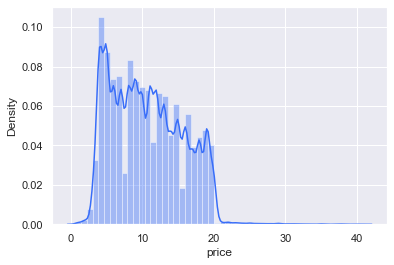

In [47]:
sns.distplot(df[df["categ"] == 0]["price"])

In [48]:
df[df["categ"] == 0]["price"].describe()

count   415475.00
mean        10.64
std          4.93
min          0.62
25%          6.29
50%          9.99
75%         14.45
max         40.99
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

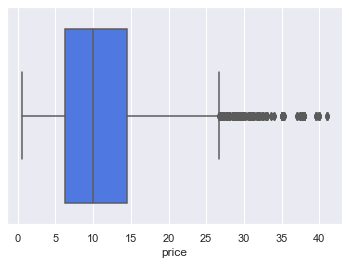

In [49]:
sns.boxplot(x="price", data=df[df["categ"] == 0])

Utilisation de la médiane pour le fillna

In [50]:
df.fillna({"price": df[df["categ"] == 0]["price"].median(), "categ": 0}, inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679353 entries, 0 to 679352
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679353 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   time        679332 non-null  object        
 5   price       679353 non-null  float64       
 6   categ       679353 non-null  category      
 7   _merge      679353 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(1), object(4)
memory usage: 37.6+ MB


In [52]:
# Merge transaction / product
df[df["_merge"] == "right_only"]

,id_prod,date,session_id,client_id,time,price,categ,_merge
679332,0_1016,NaT,NaN,NaN,NaN,35.06,0,right_only
679333,0_1780,NaT,NaN,NaN,NaN,1.67,0,right_only
679334,0_1062,NaT,NaN,NaN,NaN,20.08,0,right_only
679335,0_1119,NaT,NaN,NaN,NaN,2.99,0,right_only
679336,0_1014,NaT,NaN,NaN,NaN,1.15,0,right_only
...,...,...,...,...,...,...,...,...
679348,0_1624,NaT,NaN,NaN,NaN,24.50,0,right_only
679349,2_86,NaT,NaN,NaN,NaN,132.36,2,right_only
679350,0_299,NaT,NaN,NaN,NaN,22.99,0,right_only
679351,0_510,NaT,NaN,NaN,NaN,23.66,0,right_only


Il s'agit des produits invendus. Création d'un df_invendu et suppression de ses produits du df

In [53]:
df_invendu = df[df["_merge"] == "right_only"]
df = df[df["_merge"] != "right_only"]

In [54]:
df_invendu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 679332 to 679352
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_prod     21 non-null     object        
 1   date        0 non-null      datetime64[ns]
 2   session_id  0 non-null      object        
 3   client_id   0 non-null      object        
 4   time        0 non-null      object        
 5   price       21 non-null     float64       
 6   categ       21 non-null     category      
 7   _merge      21 non-null     category      
dtypes: category(2), datetime64[ns](1), float64(1), object(4)
memory usage: 1.4+ KB


21 références invendues

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   time        679332 non-null  object        
 5   price       679332 non-null  float64       
 6   categ       679332 non-null  category      
 7   _merge      679332 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(1), object(4)
memory usage: 37.6+ MB


Merge de df avec df_customer

In [56]:
df.head()

,id_prod,date,session_id,client_id,time,price,categ,_merge
0,0_1518,2022-05-20,s_211425,c_103,13:21:29.043970,4.18,0,both
1,0_1518,2021-09-26,s_95811,c_6197,12:37:29.780414,4.18,0,both
2,0_1518,2021-05-06,s_30782,c_682,17:14:43.117440,4.18,0,both
3,0_1518,2022-03-16,s_180057,c_5932,18:57:10.420103,4.18,0,both
4,0_1518,2022-11-12,s_296584,c_7217,18:58:10.574853,4.18,0,both


In [57]:
df_customer.head()

,client_id,sex,birth,age
0,c_4410,f,1967,56
1,c_7839,f,1975,48
2,c_1699,f,1984,39
3,c_5961,f,1962,61
4,c_5320,m,1943,80


In [58]:
df.drop(columns=["_merge"], inplace=True)

In [59]:
df_prod = df.merge(df_customer, how="outer", on="client_id", indicator=True)

In [60]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679355 entries, 0 to 679354
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679355 non-null  object        
 4   time        679332 non-null  object        
 5   price       679332 non-null  float64       
 6   categ       679332 non-null  category      
 7   sex         679355 non-null  object        
 8   birth       679355 non-null  int64         
 9   age         679355 non-null  int64         
 10  _merge      679355 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 53.1+ MB


In [61]:
df_prod["_merge"].unique()

['both', 'right_only']
Categories (2, object): ['both', 'right_only']

In [62]:
df_prod[df_prod["_merge"] == "right_only"]

,id_prod,date,session_id,client_id,time,price,categ,sex,birth,age,_merge
679332,NaN,NaT,NaN,c_8253,NaN,NaN,NaN,f,2001,22,right_only
679333,NaN,NaT,NaN,c_3789,NaN,NaN,NaN,f,1997,26,right_only
679334,NaN,NaT,NaN,c_4406,NaN,NaN,NaN,f,1998,25,right_only
679335,NaN,NaT,NaN,ct_0,NaN,NaN,NaN,f,2001,22,right_only
679336,NaN,NaT,NaN,c_2706,NaN,NaN,NaN,f,1967,56,right_only
...,...,...,...,...,...,...,...,...,...,...,...
679350,NaN,NaT,NaN,c_7584,NaN,NaN,NaN,f,1960,63,right_only
679351,NaN,NaT,NaN,c_90,NaN,NaN,NaN,m,2001,22,right_only
679352,NaN,NaT,NaN,c_587,NaN,NaN,NaN,m,1993,30,right_only
679353,NaN,NaT,NaN,ct_1,NaN,NaN,NaN,m,2001,22,right_only


Il s'agit des client_id sans transaction sur la période. Création de df_customer_no_purchase et suppression de ses clients de df_prod

In [63]:
df_customer_no_purchase = df_prod[df_prod["_merge"] == "right_only"]
df_customer_no_purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 679332 to 679354
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_prod     0 non-null      object        
 1   date        0 non-null      datetime64[ns]
 2   session_id  0 non-null      object        
 3   client_id   23 non-null     object        
 4   time        0 non-null      object        
 5   price       0 non-null      float64       
 6   categ       0 non-null      category      
 7   sex         23 non-null     object        
 8   birth       23 non-null     int64         
 9   age         23 non-null     int64         
 10  _merge      23 non-null     category      
dtypes: category(2), datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 2.1+ KB


23 clients non acheteurs sur la période

In [64]:
df_prod = df_prod[df_prod["_merge"] != "right_only"]

In [65]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   time        679332 non-null  object        
 5   price       679332 non-null  float64       
 6   categ       679332 non-null  category      
 7   sex         679332 non-null  object        
 8   birth       679332 non-null  int64         
 9   age         679332 non-null  int64         
 10  _merge      679332 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 53.1+ MB


df_prod clean pour l'analyse

In [66]:
df_prod.drop(columns=["_merge"], inplace=True)

In [67]:
df_prod.head()

,id_prod,date,session_id,client_id,time,price,categ,sex,birth,age
0,0_1518,2022-05-20,s_211425,c_103,13:21:29.043970,4.18,0,f,1986,37
1,0_1518,2021-07-20,s_64849,c_103,13:21:29.043970,4.18,0,f,1986,37
2,0_1518,2022-08-20,s_255965,c_103,13:21:29.043970,4.18,0,f,1986,37
3,0_1418,2022-06-18,s_225411,c_103,01:49:37.823274,8.57,0,f,1986,37
4,0_1418,2021-08-18,s_77214,c_103,01:49:37.823274,8.57,0,f,1986,37


In [68]:
df_prod.date.max()

Timestamp('2023-02-28 00:00:00')

In [69]:
df_prod.date.min()

Timestamp('2021-03-01 00:00:00')

In [70]:
# Création de la variable mois
df_prod["purchase_month"] = df_prod["date"].dt.month

In [71]:
# Suppression de la variable birth
del df_prod["birth"]

In [74]:
df_prod

,id_prod,date,session_id,client_id,time,price,categ,sex,age,purchase_month
0,0_1518,2022-05-20,s_211425,c_103,13:21:29.043970,4.18,0,f,37,5
1,0_1518,2021-07-20,s_64849,c_103,13:21:29.043970,4.18,0,f,37,7
2,0_1518,2022-08-20,s_255965,c_103,13:21:29.043970,4.18,0,f,37,8
3,0_1418,2022-06-18,s_225411,c_103,01:49:37.823274,8.57,0,f,37,6
4,0_1418,2021-08-18,s_77214,c_103,01:49:37.823274,8.57,0,f,37,8
...,...,...,...,...,...,...,...,...,...,...
679327,2_147,2021-07-23,s_65994,c_4391,07:01:38.963669,181.99,2,f,22,7
679328,0_142,2022-03-25,s_184472,c_1232,18:07:25.880052,19.85,0,f,63,3
679329,0_142,2021-09-25,s_95415,c_1232,18:07:25.880052,19.85,0,f,63,9
679330,2_205,2021-03-11,s_4605,c_7534,00:11:32.016264,100.99,2,m,31,3


In [73]:
df_prod.to_pickle("data/df_prod.pkl")
df_invendu.to_pickle("data/df_invendu.pkl")
df_customer_no_purchase.to_pickle("data/df_customer_no_purchase.pkl")
df_customer.to_pickle("data/df_customer.pkl")